In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import seaborn as sns
 

In [216]:
df = pd.read_csv('data/clean/immoscout_only_numeric.csv')
df.head(5)

,Unnamed: 0,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,...,gde_workers_total,type,rooms,floor,living_space_m2,floor_space_m2,plot_area_m2,availability,municipality,price
0,0,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,penthouse,5.0,4,100.0,NaN,NaN,On request,Biberstein,1150000.0
1,1,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,terrace-house,5.0,NaN,156.0,242.0,222,On request,Biberstein,1420000.0
2,2,0.163362,0.095877,0.001911,47.397416,8.043150,0.0,0.0,0.0,0.334957,...,33493.0,penthouse,5.0,NaN,93.0,NaN,NaN,NaN,NaN,720000.0
3,3,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,detached-house,5.0,NaN,154.0,257.0,370,On request,Biberstein,1430000.0
4,4,0.333865,0.279276,0.145835,47.404870,8.052781,0.0,0.0,0.0,0.133498,...,1355.0,flat,5.0,0,142.0,NaN,NaN,On request,Küttigen,995000.0


In [217]:
df['price'].describe() 

count    1.236200e+04
mean     1.171045e+06
std      1.346819e+06
min      1.000000e+00
25%      5.850000e+05
50%      8.650000e+05
75%      1.318000e+06
max      4.500000e+07
Name: price, dtype: float64

In [218]:
df['living_space_m2'].describe()

count    12308.000000
mean       158.687195
std        120.631122
min          1.000000
25%        100.000000
50%        131.000000
75%        180.000000
max       4390.000000
Name: living_space_m2, dtype: float64

In [219]:

x = df['price'].values.reshape(1,-1)
y = df['living_space_m2'].values.reshape(1,-1)

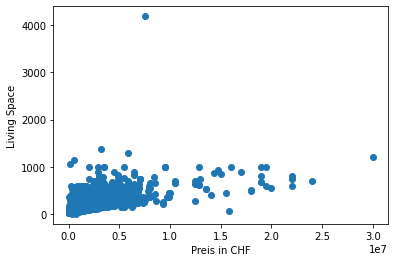

In [220]:
plt.scatter(x,y)
plt.xlabel('Preis in CHF')
plt.ylabel('Living Space')
plt.show()

In [221]:
#Hat es Np.any(np.isnan()) in den Daten?
np.any(np.isnan(x)), np.any(np.isnan(y))

(True, True)

In [222]:
#NANs entfernen
mask = ~pd.isna(x) & ~pd.isna(y)
x = x[mask]
y = y[mask]
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [223]:
#Lineare Regression wird berechnet
model = LinearRegression(fit_intercept= True).fit(x, y)
x_new = np.arange(0,30000000).reshape(-1,1)
y_new = model.predict(x_new) 

In [224]:
# Modelscore berechnen
'''Score bleibt gleich bei vertauschten x und y Achsen'''
r_2 = model.score(x,y)
r_2

0.41112489683448383

Text(0, 0.5, 'Fläche in m2')

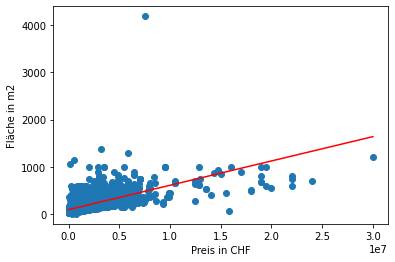

In [225]:
#Hier sehen wir die modellierte Lineare Regression mit den Realen Anzahl Punkten
plt.scatter(x,y)
plt.plot(x_new,y_new, color = 'r')
plt.xlabel('Preis in CHF')
plt.ylabel('Fläche in m2')

(0.0, 1000.0)

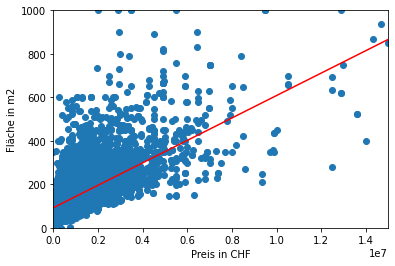

In [232]:
plt.scatter(x,y)
plt.plot(x_new,y_new, color = 'r')
plt.xlabel('Preis in CHF')
plt.ylabel('Fläche in m2')
plt.xlim(0,15000000)
plt.ylim(0,1000)


In [234]:
#Anzahl Quadrahtmeter für 1'500'000 CHF
model.predict([[1500000]])

array([[169.70710084]])

In [237]:
#Anzahl Quadrahtmeter für 100CHF
'''Modell funktioniert bei kleinen Geldbeträgen sehr schlecht'''
model.predict([[100]])

array([[92.32305444]])

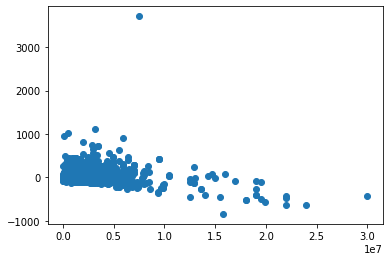

In [227]:
#Residuen werden berechnet
'''Residuentest:
1. Residuen müssen um 0 gleichverteilt sein
2. Residuen dürfen keinen systematischen Fehler aufweisen
3. Residuen müssen annährend Normalverteilt sein'''
predict= model.predict(x)
resid = y-predict 
plt.scatter(x,resid)

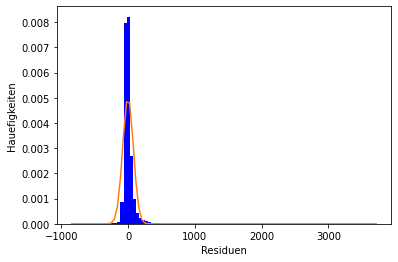

In [228]:
n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)
plt.xlabel('Residuen')
plt.ylabel('Hauefigkeiten')

mu = np.average(resid)
sigma = np.std(resid)

y_norm = norm.pdf(bins, mu, sigma)
plt.plot(bins, y_norm)
